## 1. Import libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Path configuration

In [2]:
RAW_DATA_PATH = '../data/raw/Volve production data.xlsx'

## 3. Selective column loading

In [3]:
cols_to_use = [
    'NPD_WELL_BORE_NAME', 
    'DATEPRD', 
    'BORE_OIL_VOL', 
    'BORE_GAS_VOL', 
    'BORE_WAT_VOL', 
    'AVG_DOWNHOLE_PRESSURE'
]

print("Loading data from the Volve Field...")
df_raw = pd.read_excel(RAW_DATA_PATH, usecols=cols_to_use)

Loading data from the Volve Field...


## 4. Basic initial cleaning

In [ ]:
df_raw['DATEPRD'] = pd.to_datetime(df_raw['DATEPRD'])
df_raw.columns = [col.lower() for col in df_raw.columns]    # Normalize to lowercase

## 5. Identify the 5 wells with the longest production history.

In [10]:
df_active_prod = df_raw[df_raw['bore_oil_vol'] > 0].copy()

top_5_wells = df_active_prod['npd_well_bore_name'].value_counts().head(5).index.tolist()

print(f"Wells selected for comparative analysis: {top_5_wells}")

Wells selected for comparative analysis: ['15/9-F-12', '15/9-F-14', '15/9-F-11', '15/9-F-15 D', '15/9-F-1 C']


## 6. Create DataFrames dictionaries (one for each well)

In [11]:
wells_dict = {}
for well in top_5_wells:
    temp_df = df_raw[df_raw['npd_well_bore_name'] == well].copy()
    temp_df = temp_df.sort_values('dateprd')
    # Cleaning: Remove days with production <= 0 for curve adjustment.
    temp_df = temp_df[temp_df['bore_oil_vol'] > 0]
    wells_dict[well] = temp_df

print(f"\nData loaded and ready for all {len(wells_dict)} wells.")


Data loaded and ready for all 5 wells.


## 7. Save the data of the selected wells.

In [12]:
df_top_wells = df_raw[df_raw['npd_well_bore_name'].isin(top_5_wells)]
df_top_wells.to_csv('../data/processed/well_data_cleaned.csv', index=False)
print("Data processed and saved successfully to data/processed/!")

Data processed and saved successfully to data/processed/!


## 8. Visualization Block: Well Comparison (FacetGrid)

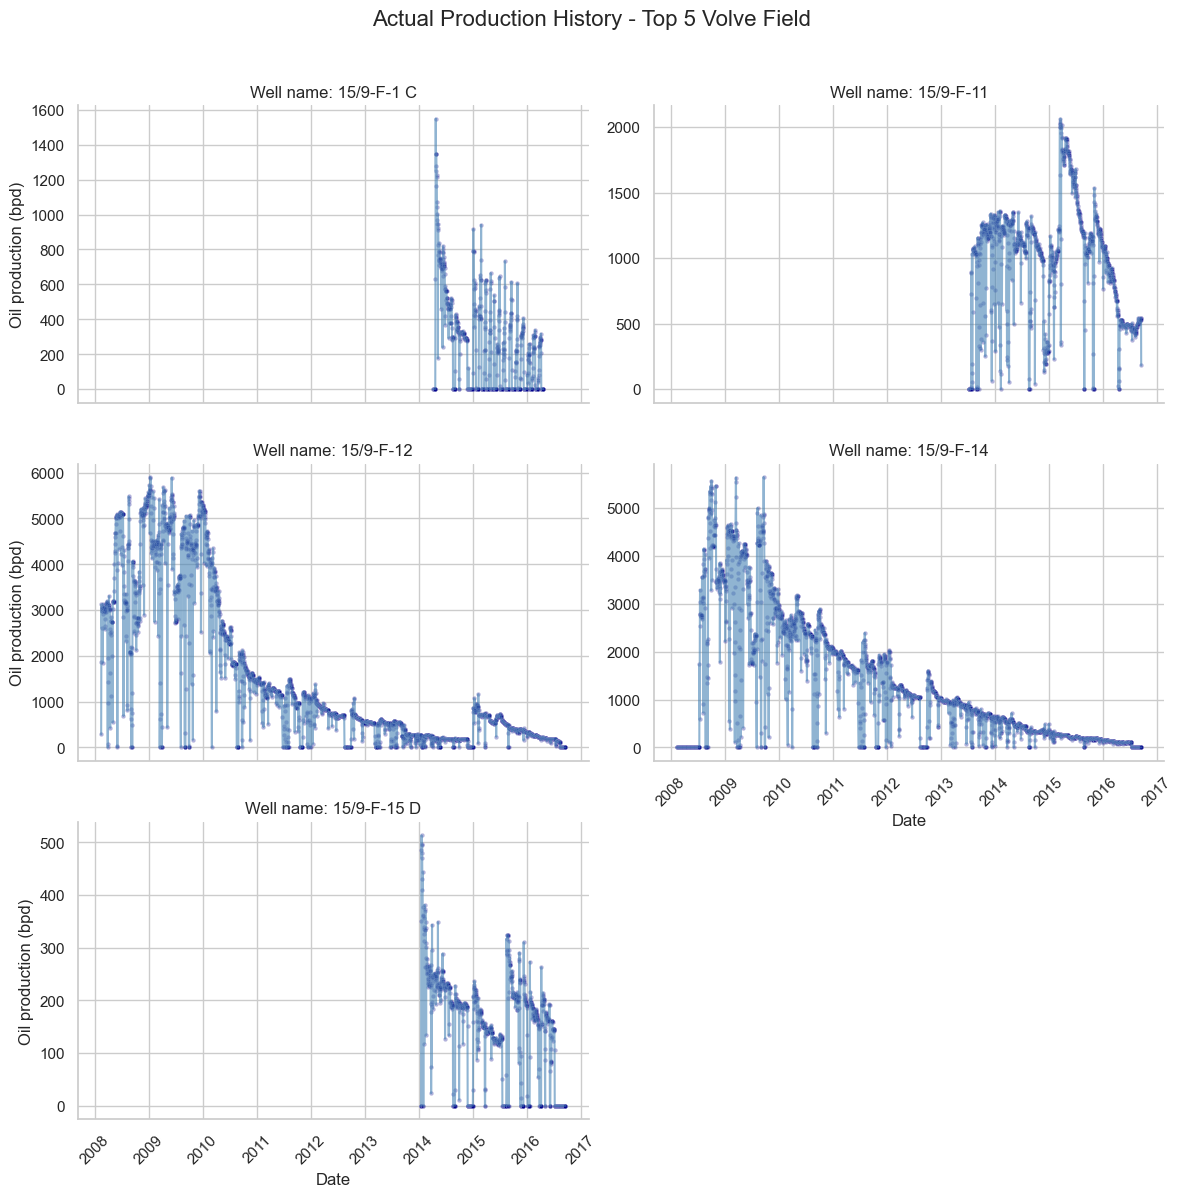

In [13]:
# Configure the visual style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Create the FacetGrid
g = sns.FacetGrid(df_top_wells, col="npd_well_bore_name", col_wrap=2, height=4, aspect=1.5, sharey=False)

# Map the data to line and scatter plots
g.map(sns.lineplot, "dateprd", "bore_oil_vol", color="steelblue", alpha=0.6)
g.map(sns.scatterplot, "dateprd", "bore_oil_vol", color="darkblue", s=10, alpha=0.3)

# Adjust aesthetic details
g.set_axis_labels("Date", "Oil production (bpd)")
g.set_titles(col_template="Well name: {col_name}")

# Rotate the dates so they are legible
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Actual Production History - Top 5 Volve Field', fontsize=16)

# Save image
plt.savefig('../docs/production_comparison.png', bbox_inches='tight')

plt.show()